In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
dir(nltk)

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyG

In [2]:
df = pd.read_csv("D:/python_learning/Ex_Files_NLP_Python_ML_EssT/SMSSpamCollection.tsv", sep='\t', header=None)
df.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
df.rename(columns={0:'type',1:'text'}, inplace=True)

In [4]:
pd.set_option('display.max_colwidth',80)
df.head()

,type,text
0,ham,I've been searching for the right words to thank you for this breather. I pr...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_pun(text):
    nonpun = "".join([char for char in text if char not in string.punctuation])
    return nonpun

df['text_clean'] = df['text'].apply(lambda x: remove_pun(x))
df.head()

,type,text,text_clean
0,ham,I've been searching for the right words to thank you for this breather. I pr...,Ive been searching for the right words to thank you for this breather I prom...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA t...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [7]:
def tokenize(text):
    token = re.split('\W+', text)
    return token

df['text_tokenized'] = df['text_clean'].apply(lambda x: tokenize(x.lower()))
df.head()

,type,text,text_clean,text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I pr...,Ive been searching for the right words to thank you for this breather I prom...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, br..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA t...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, lik..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [8]:
# Removing stop words
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def remove_sw(text_list):
    filtered = [word for word in text_list if word not in stopwords]
    return filtered

df['text_filtered'] = df['text_tokenized'].apply(lambda x: remove_sw(x))

df.head()

,type,text,text_clean,text_tokenized,text_filtered
0,ham,I've been searching for the right words to thank you for this breather. I pr...,Ive been searching for the right words to thank you for this breather I prom...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, br...","[ive, searching, right, words, thank, breather, promise, wont, take, help, g..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA t...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, tex..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, lik...","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [9]:
lm = nltk.WordNetLemmatizer()

def lemmatize_words(text):
    word_lm = [lm.lemmatize(word) for word in text ]
    return word_lm

df['text_lemmatized'] = df['text_filtered'].apply(lambda x: lemmatize_words(x))

df.head()

,type,text,text_clean,text_tokenized,text_filtered,text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I pr...,Ive been searching for the right words to thank you for this breather I prom...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, br...","[ive, searching, right, words, thank, breather, promise, wont, take, help, g...","[ive, searching, right, word, thank, breather, promise, wont, take, help, gr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA t...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, tex...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, tex..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, lik...","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


### Feature Engineering

In [10]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['body_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['text'].apply(lambda x: count_punct(x))

In [11]:
df.head()

,type,text,text_clean,text_tokenized,text_filtered,text_lemmatized,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I pr...,Ive been searching for the right words to thank you for this breather I prom...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, br...","[ive, searching, right, words, thank, breather, promise, wont, take, help, g...","[ive, searching, right, word, thank, breather, promise, wont, take, help, gr...",160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA t...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, tex...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, tex...",128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, lik...","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]",62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]",28,7.1


In [13]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [lm.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['text', 'body_len', 'punct%']], df['type'], test_size=0.2)

In [27]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

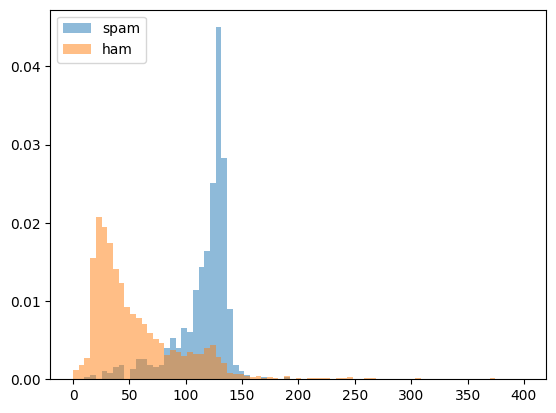

In [40]:
bins = np.linspace(0, 400, 80)

pyplot.hist(df[df['type']=='spam']['body_len'], bins, density=True, alpha=0.5,  label='spam')
pyplot.hist(df[df['type']=='ham']['body_len'], bins, density=True, alpha=0.5,  label='ham')
pyplot.legend(loc='upper left')
pyplot.show()
# df.head()

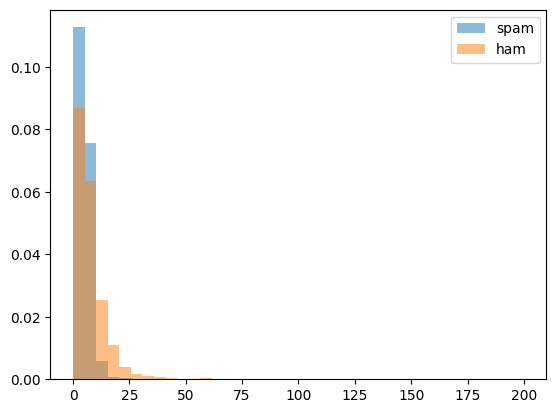

In [41]:
bins = np.linspace(0, 200, 40)

pyplot.hist(df[df['type']=='spam']['punct%'], bins, density=True, alpha=0.5,  label='spam')
pyplot.hist(df[df['type']=='ham']['punct%'], bins, density=True, alpha=0.5,  label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

### Vectorizing the Data

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])


X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vect_fit.get_feature_names_out())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray(), columns=tfidf_vect_fit.get_feature_names_out())], axis=1)

X_train_vect.head()

,body_len,punct%,,0,008704050406,0089my,0121,01223585236,01223585334,0125698789,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,é,ü,üll
0,40,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38,15.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

### Random forest 

In [21]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 5.75 / Predict time: 0.42 ---- Precision: 1.0 / Recall: 0.829 / Accuracy: 0.976


### Gradient Boosting

In [22]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 129.339 / Predict time: 0.217 ---- Precision: 0.944 / Recall: 0.854 / Accuracy: 0.972
